### Gradient Descent

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("student_scores.csv")

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
# Model selection (train test split)
from sklearn.model_selection import train_test_split
# creating only two variable for train and test data set 
df_train , df_test = train_test_split(df, train_size=0.7, random_state= 0)
# print("train size:{1} /n test size:{2}".format(df_train.shape,df_test.shape))

In [10]:
print(df_test.shape)
print(df_train.shape)

(8, 2)
(17, 2)


In [15]:
# preprocessing data (MinMaxSaler) it is also known as normalization 
# range between 0 to 1
from sklearn.preprocessing import MinMaxScaler
feature_Scaling = MinMaxScaler()

columns_feature= ["Hours","Scores"]

#applying on train data 

norm_train_data = feature_Scaling.fit_transform(df_train.loc[:,columns_feature])
print(norm_train_data, type(norm_train_data))

[[0.71604938 0.75641026]
 [0.         0.        ]
 [0.49382716 0.38461538]
 [0.81481481 0.87179487]
 [0.27160494 0.32051282]
 [0.88888889 0.82051282]
 [1.         0.91025641]
 [0.61728395 0.64102564]
 [0.2962963  0.16666667]
 [0.19753086 0.1025641 ]
 [0.54320988 0.55128205]
 [0.19753086 0.16666667]
 [0.91358025 0.74358974]
 [0.17283951 0.05128205]
 [0.45679012 0.47435897]
 [0.96296296 1.        ]
 [0.41975309 0.30769231]] <class 'numpy.ndarray'>


In [16]:
df_train = pd.DataFrame(norm_train_data, columns = columns_feature)

df_train.head()



,Hours,Scores
0,0.716049,0.756410
1,0.000000,0.000000
2,0.493827,0.384615
3,0.814815,0.871795
4,0.271605,0.320513


In [17]:
x_train = np.array(df_train.loc[:,["Hours"]])
y_train = np.array(df_train.loc[:,["Scores"]])

### Now building gradient descent algorithm
First we have to set parameter randomly in our initial stage 
<br>like learning rate (alpha) and no of iteration 

Hypothesis
<br>
$h_\theta(x) =\theta_0 +\theta_1 x$

Parameters : $\theta_0 ,\theta_1$
<br>

Cost Function / Squared Error Function:

$ J(\theta_0 ,\theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)}\right)^{2}$

Gradient Descent Algorithm
<br>
{
<br>
$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$
<br>
(for $j = 0$ and $j = 1$)  
<br>
}

<br>
NOTE $- (:=)$ this symbol is used as a assignment operator
where,<br>
$\alpha =$Lerning Parameter  


Simultaneous Update
<br>
temp0$:= \theta_j - \alpha \frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$   ... (equ 1)
<br>
temp1$:= \theta_j - \alpha \frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)$   ... (equ 2)
<br>
$\theta_0:=$ temp0
<br>
$\theta_1:=$ temp1






### Taking derivative with respective $\theta_0$

$ \frac{d}{d \theta_0} J(\theta_0, \theta_1) = \frac{d}{d \theta_0} \frac{1}{2m} \sum_{i=1}^{m} [ \theta_0 + \theta_1 x^{(i)} - y^{(i)}]^{2}$
<br><br>
$ \frac{d}{d \theta_0} J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} 2 [ \theta_0 + \theta_1 x^{(i)} - y^{(i)}] *1$
<br><br>
$ \frac{d}{d \theta_0} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m}  [ \theta_0 + \theta_1 x^{(i)} - y^{(i)}]$
<br><br>
$ \frac{d}{d \theta_0} J(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^{m}  [  h_\theta(x^{(i)})- y^{(i)}]$  ...Derived Equation



### Taking derivative with respective $\theta_1$

$ \frac{d}{d \theta_1} J(\theta_0, \theta_1) = \frac{d}{d \theta_0} \frac{1}{2m} \sum_{i=1}^{m} [ \theta_0 + \theta_1 x^{(i)} - y^{(i)}]^{2}$
<br><br>
$ \frac{d}{d \theta_1} J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} 2 [ \theta_0 + \theta_1 x^{(i)} - y^{(i)}] * x^{(i)}$
<br><br>
$ \frac{d}{d \theta_1} J(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m}  [ \theta_0 + \theta_1 x^{(i)} - y^{(i)}]*x^{(i)}$
<br><br>
$ \frac{d}{d \theta_1} J(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^{m}  [  h_\theta(x^{(i)})- y^{(i)}]*x^{(i)}$ ...Derived Equation


### Gradient Descent Algorithm
$\theta_0 := \theta_0 - \alpha \frac{1}{m}\sum_{i=1}^{m}  [h_\theta(x^{(i)})- y^{(i)}]$
<br>
$\theta_1 := \theta_1 - \alpha \frac{1}{m}\sum_{i=1}^{m}  [h_\theta(x^{(i)})- y^{(i)}]$

In [27]:
def gradient(x, y, alpha= 0.001, iters=100000, theta1= 0, theta0 =0):
    m = float(len(y))
    grad = pd.DataFrame( columns =['slope','intercept', 'mse'])
    for i in range(iters):
        hypothesis = theta0 + (theta1 *x)
        mse = sum([error**2 for error in (y-hypothesis)]) /(2*m)
        derivative_theta0 =  (1/m) * sum(hypothesis -y)            #derivative w.r.to theta0
        derivative_theta1 =  (1/m) * sum((hypothesis -y)*x)         #derivative w.r.to theta1        
        theta0 = theta0 - (alpha * derivative_theta0)             #updating theta0
        theta1 = theta1 - (alpha * derivative_theta1)             #updating theta1
        grad.loc[i] = [theta1,theta0,mse]
    return(grad)

In [28]:
grad = gradient(x_train, y_train)
grad.tail()

,slope,intercept,mse
99995,[1.0158795319309828],[-0.0491546304956737],[0.002602950780831611]
99996,[1.0158795765974211],[-0.049154655856372076],[0.0026029507781930705]
99997,[1.0158796212606698],[-0.04915468121525938],[0.0026029507755549095]
99998,[1.0158796659207288],[-0.049154706572335734],[0.002602950772917124]
99999,[1.0158797105775985],[-0.049154731927601274],[0.002602950770279717]


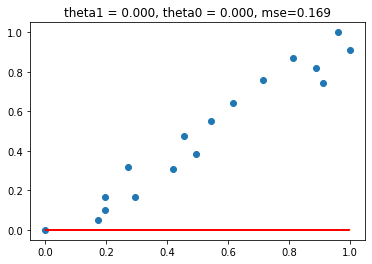

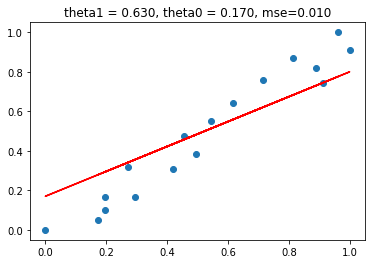

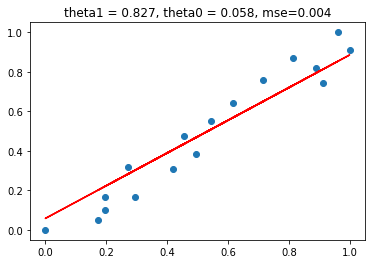

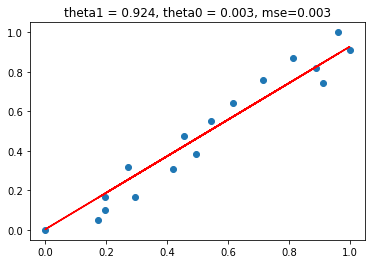

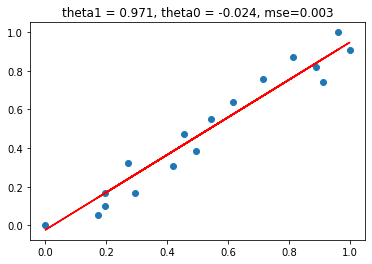

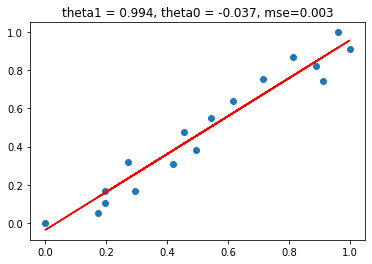

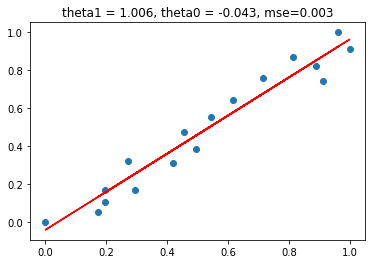

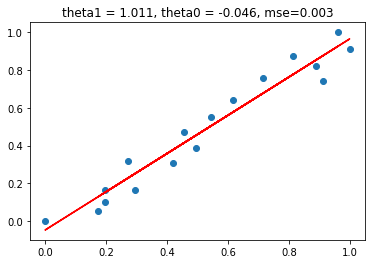

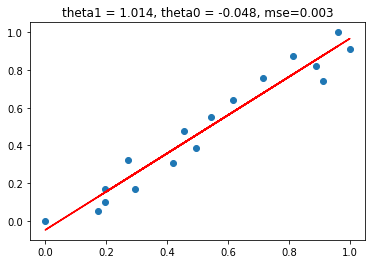

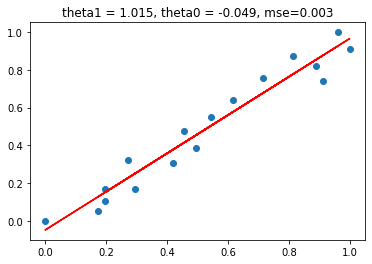

In [34]:
import time

for i in range(0, grad.shape[0], 10000):
    plt.scatter(x_train, y_train)
    plt.plot(x_train, grad.iloc[i, 1] + grad.iloc[i, 0] * x_train, 'r')
    plt.title("theta1 = %.3f, theta0 = %.3f, mse=%.3f"%(grad.iloc[i, 0], grad.iloc[i, 1], grad.iloc[i, 2]))
    plt.show()
    time.sleep(1)

In [30]:
#grad.to_csv('result.csv',header=False, index=False)


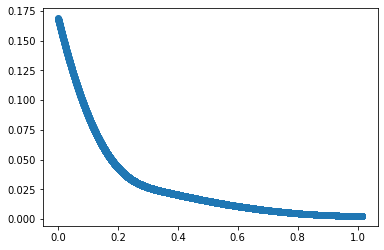

In [43]:
plt.scatter(x = grad.iloc[:,0], y= grad.iloc[:,-1])